In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random



import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt



In [6]:
def conv(num_layers, pooling):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (2, 2), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (2, 2), activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))

    return model

In [119]:
#better data format than what was used in q1-a
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()

#normalize datas
train_x, test_x = train_x / 255.0, test_x / 255.0



In [100]:
mod = conv(2, pooling=layers.MaxPool2D)
mod.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 31, 31, 32)        416       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 6, 6, 128)         32896     
_________________________________________________________________
flatten_21 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)              

In [102]:


mod.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history = mod.fit(train_x, train_y, epochs = 20, validation_data=(test_x,  test_y))

Epoch 1/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4622 - accuracy: 0.4692 - val_loss: 1.2467 - val_accuracy: 0.5636
Epoch 2/20
1563/1563 [==============================] - 23s 14ms/step - loss: 1.0800 - accuracy: 0.6179 - val_loss: 1.0597 - val_accuracy: 0.6296
Epoch 3/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9343 - accuracy: 0.6717 - val_loss: 0.9081 - val_accuracy: 0.6842
Epoch 4/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8302 - accuracy: 0.7095 - val_loss: 0.8608 - val_accuracy: 0.6999
Epoch 5/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.7579 - accuracy: 0.7361 - val_loss: 0.8728 - val_accuracy: 0.6980
Epoch 6/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6904 - accuracy: 0.7600 - val_loss: 0.8364 - val_accuracy: 0.7182
Epoch 7/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6394 - accuracy: 0.7764 - val_loss: 0.8442 -

In [10]:
history.history

313/313 - 1s - loss: 0.8711 - accuracy: 0.7283


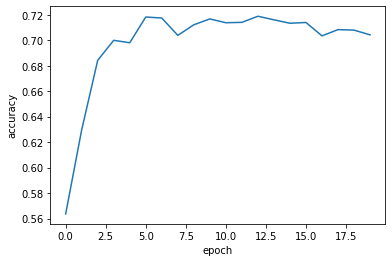

In [104]:
plt.plot(list(history.history["val_accuracy"]))
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.savefig("q1-c_acc.jpg")